# Heart Disease Prediction using Machine Lerning

#  Importing the essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'Heart Disease.ipynb', 'Heart Disease.pdf', 'Heart Disease2.ipynb', 'labels.csv', 'values.csv']


#  Loading datasets and merging them 

In [2]:
df1 = pd.read_csv("values.csv")
df2 = pd.read_csv("labels.csv")

In [3]:
df = pd.merge(df1,df2, on = 'patient_id' , how = 'inner')

# Printing out few columns

In [4]:
df.head(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [5]:
df.sample(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
22,jhdvtb,1,normal,106,4,2,0,0,223,0.3,0,67,142,0,0
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
24,83asqd,1,normal,156,2,0,0,2,245,0.0,1,70,143,0,0
148,cpqg4x,1,normal,108,3,0,0,0,243,0.0,1,47,152,0,1
100,rfj25e,1,normal,140,3,0,0,2,321,0.0,1,39,182,0,0


# Description

In [6]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

# Drop the columns

In [8]:
df = df.drop(columns=['patient_id'])

# Encode 'thal' column

In [9]:
le = LabelEncoder()
df['thal'] = le.fit_transform(df['thal'])

In [10]:
df.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,1.366667,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,0.568247,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,2.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


# Removing Null Values

In [11]:
df.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

# Remove Duplicate value

In [12]:
df.duplicated().sum()

0

# Shape of data

In [13]:
df.shape

(180, 14)

# Checking for outliers

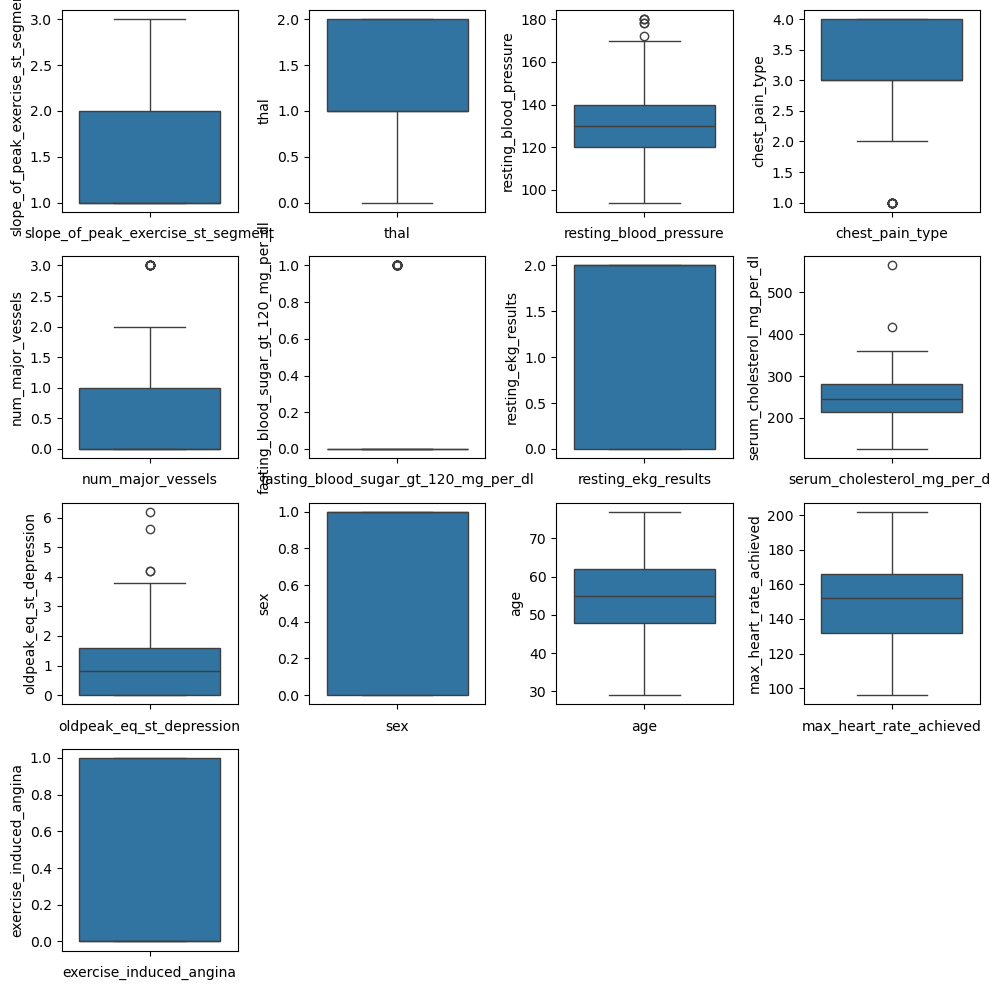

In [14]:
plt.figure(figsize=(10,10))
plotnumber = 1

for i in df.drop(['heart_disease_present'],axis=1):
    if plotnumber <= 15:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(y=df[i],ax=ax)
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()
plt.show()

# Let's understand our columns better

In [15]:
df.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

#  Analyse the heart_disease_present variable

In [16]:
df['heart_disease_present'].describe()

count    180.000000
mean       0.444444
std        0.498290
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: heart_disease_present, dtype: float64

In [17]:
df.dtypes

slope_of_peak_exercise_st_segment         int64
thal                                      int32
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

In [18]:
df['heart_disease_present'].unique()

array([0, 1], dtype=int64)

# Checking correlation between columns

In [19]:
print(df.corr()["heart_disease_present"].abs().sort_values(ascending=False))


heart_disease_present                   1.000000
exercise_induced_angina                 0.448647
thal                                    0.447214
num_major_vessels                       0.421519
chest_pain_type                         0.412829
oldpeak_eq_st_depression                0.382930
max_heart_rate_achieved                 0.375352
slope_of_peak_exercise_st_segment       0.344224
sex                                     0.335421
resting_ekg_results                     0.145933
age                                     0.138255
serum_cholesterol_mg_per_dl             0.079775
resting_blood_pressure                  0.078506
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
Name: heart_disease_present, dtype: float64


In [20]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Exploratory Data Analysis (EDA)


In [21]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
thal,180.0,1.366667,0.568247,0.0,1.00,1.0,2.00,2.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0


In [22]:
df.info("sex")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    int32  
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

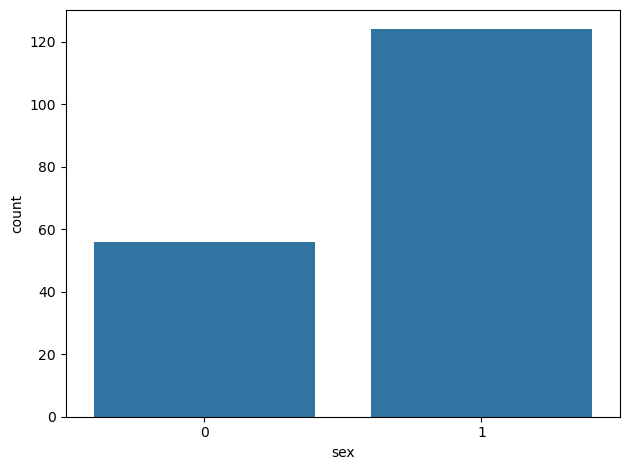

In [23]:
import seaborn as sns
sns.countplot(x="sex",data=df)
print()
plt.tight_layout()
plt.show()

In [24]:
df['thal'].value_counts()                

thal
1    98
2    74
0     8
Name: count, dtype: int64

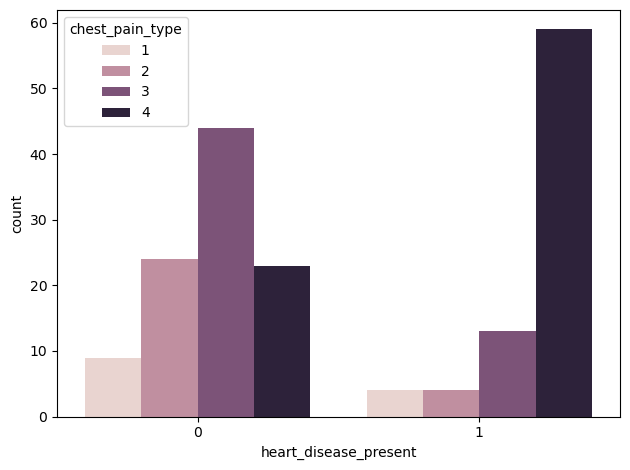

In [25]:
sns.countplot(x='heart_disease_present',hue='chest_pain_type',data=df)
plt.tight_layout()
plt.show()

# Analysing the 'Chest Pain Type' feature

In [26]:
df["chest_pain_type"].unique()

array([2, 3, 4, 1], dtype=int64)

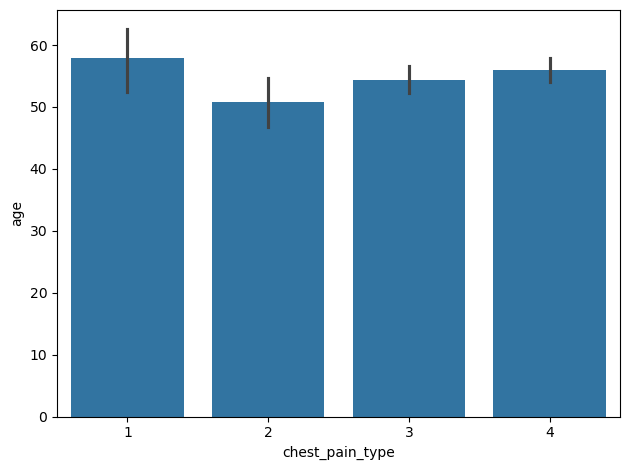

In [27]:
sns.barplot(x="chest_pain_type",y="age",data=df)
plt.tight_layout()
plt.show()

# Analysing the FBS feature

In [28]:
df["fasting_blood_sugar_gt_120_mg_per_dl"].describe()

count    180.000000
mean       0.161111
std        0.368659
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fasting_blood_sugar_gt_120_mg_per_dl, dtype: float64

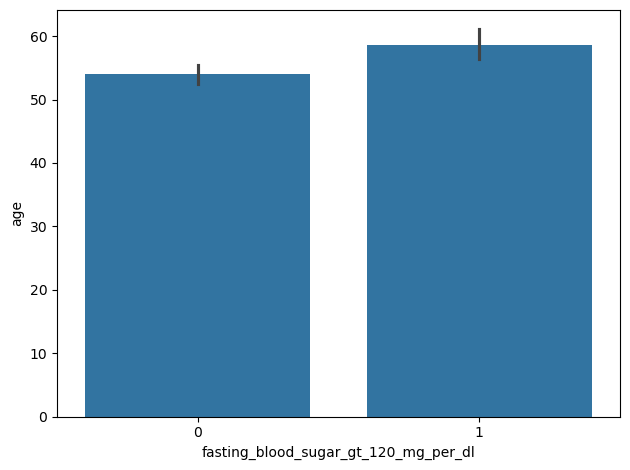

In [29]:
sns.barplot(x="fasting_blood_sugar_gt_120_mg_per_dl",y="age",data=df)
plt.tight_layout()
plt.show()

 # Modelling and predicting with Machine Learning

The main goal of the entire project is to predict heart disease occurrence with the highest accuracy. In order to achieve this, we will test several classification algorithms. This section includes all results obtained from the study and introduces the best performer according to accuracy metric. I have chosen several algorithms typical for solving supervised learning problems throughout classification methods.

First of all, let's equip ourselves with a handy tool that benefits from the cohesion of SciKit Learn library and formulate a general function for training our models. The reason for displaying accuracy on both, train and test sets, is to allow us to evaluate whether the model overfits or underfits the data (so-called bias/variance tradeoff).

# Train and Split

In [30]:
from sklearn.model_selection import train_test_split

predictors = df.drop("heart_disease_present",axis=1)
heart_disease_present = df["heart_disease_present"] 

X_train,X_test,Y_train,Y_test = train_test_split(predictors,heart_disease_present,test_size=0.20,random_state=0)

In [31]:
X_train.shape

(144, 13)

In [32]:
X_test.shape

(36, 13)

In [33]:
Y_train.shape

(144,)

In [34]:
Y_test.shape

(36,)

# Model Fitting

In [35]:
from sklearn.metrics import accuracy_score 

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [37]:
Y_pred_lr.shape

(36,)

In [38]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.11 %


# Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [40]:
Y_pred_nb.shape

(36,)

In [41]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 80.56 %


# SVM

In [42]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [43]:
Y_pred_svm.shape

(36,)

In [44]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 80.56 %


# K Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [46]:
Y_pred_knn.shape

(36,)

In [47]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 55.56 %


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [57]:
print(Y_pred_dt.shape)

(36,)


In [58]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 77.78 %


# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)



In [68]:
Y_pred_rf.shape

(36,)

In [69]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 88.89 %


# XGBoost

In [70]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [71]:
Y_pred_xgb.shape

(36,)

In [72]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 77.78 %


# Output Final Score

In [73]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.11 %
The accuracy score achieved using Naive Bayes is: 80.56 %
The accuracy score achieved using Support Vector Machine is: 80.56 %
The accuracy score achieved using K-Nearest Neighbors is: 55.56 %
The accuracy score achieved using Decision Tree is: 77.78 %
The accuracy score achieved using Random Forest is: 88.89 %
The accuracy score achieved using XGBoost is: 77.78 %


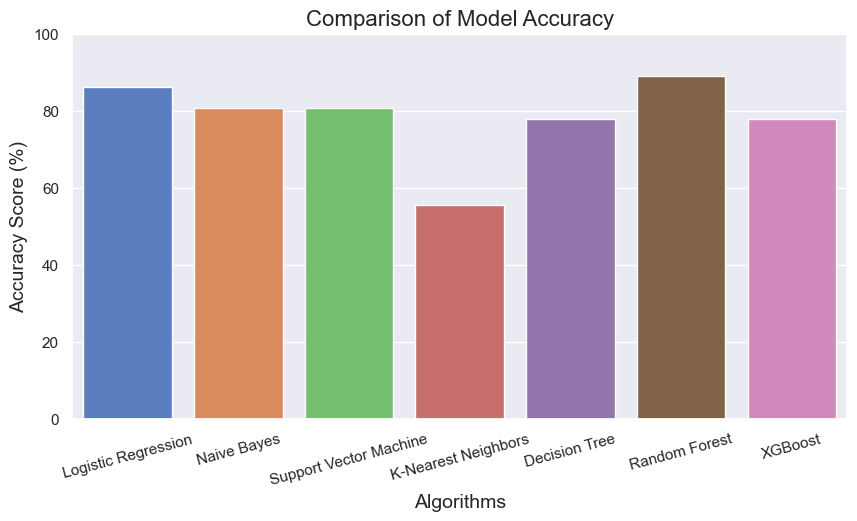

In [74]:
sns.set(rc={'figure.figsize': (10, 5)})

sns.barplot(x=algorithms, y=scores, palette="muted")

plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Accuracy Score (%)", fontsize=14)
plt.title("Comparison of Model Accuracy", fontsize=16)
plt.ylim(0, 100)
plt.xticks(rotation=15)
plt.show()


0.9565972222222222


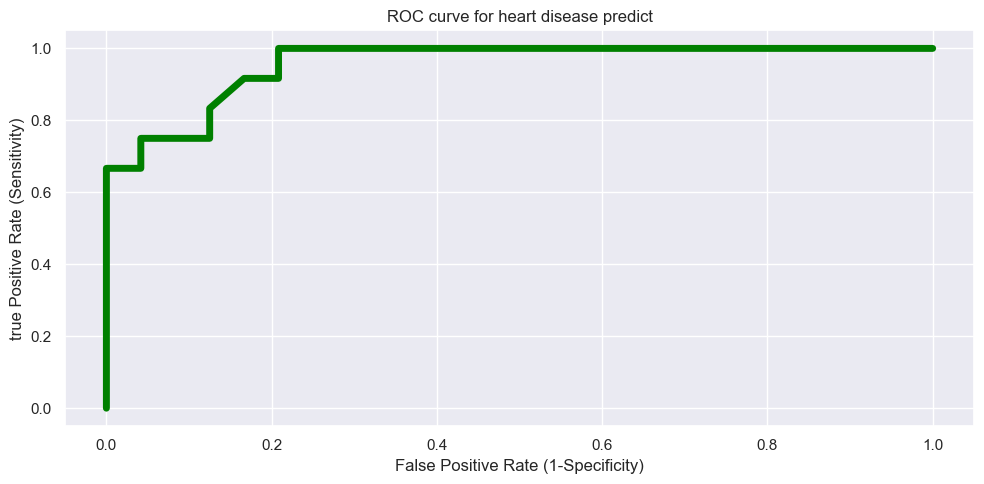

In [78]:
# Define and train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)
from sklearn.metrics import roc_curve,roc_auc_score

Y_predict = model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(Y_test,Y_predict)
plt.title('ROC curve for heart disease predict')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('true Positive Rate (Sensitivity)')
plt.plot(fpr,tpr,color='green',lw=5)
print(roc_auc_score(Y_test,Y_predict))
plt.tight_layout()
plt.show()

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print("R² Score:", r2_score(Y_test, Y_pred))


R² Score: 0.3570749999999999
